In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [91]:
# Read in the gdp dataset
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [92]:
gdp_df = gdp_df[:-2]

In [93]:
# Look at first 10 rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [94]:
# Look at last 5 rows
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [95]:
gdp_df.describe()

,Value,Value Footnotes
count,6729.000000,1.0
mean,15468.017091,2.0
std,17995.866104,NaN
min,438.643111,2.0
25%,3170.407545,2.0
50%,8959.240204,2.0
75%,20940.081023,2.0
max,134959.989044,2.0


In [96]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [97]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [98]:
gdp_df.head(10)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
5,Afghanistan,2013,1807.762344
6,Afghanistan,2012,1772.764974
7,Afghanistan,2011,1626.764793
8,Afghanistan,2010,1671.581238
9,Afghanistan,2009,1502.354073


In [99]:
gdp_df.head(-5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6719,Zimbabwe,1999,3054.064189
6720,Zimbabwe,1998,3099.076182
6721,Zimbabwe,1997,3036.422224
6722,Zimbabwe,1996,2985.856605


In [100]:
gdp_df.shape

(6729, 3)

In [101]:
print(gdp_df.dtypes)


Country            object
Year               object
GDP_Per_Capita    float64
dtype: object


In [102]:
gdp_df.Year = pd.to_numeric(gdp_df.Year)

In [103]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [104]:
# 8.  Notice that the count increases until 2011, then declines. Sharp decline from 2017 - 2018  
gdp_df.Year.value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

In [105]:
#9
gdp_df.Country.value_counts()

Bangladesh                   29
Belize                       29
Mozambique                   29
Micronesia                   29
Trinidad and Tobago          29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

In [106]:
gdp_df.Country.describe()

count           6729
unique           243
top       Bangladesh
freq              29
Name: Country, dtype: object

In [107]:
gdp_df.Country.index

RangeIndex(start=0, stop=6729, step=1)

In [108]:
#10.  Create dataset for 2014 only called gdp_2014
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [109]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [110]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


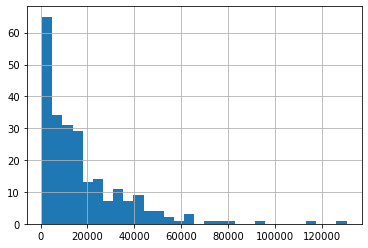

In [111]:
gdp_2014['GDP_Per_Capita'].hist(bins=30)

In [112]:
# Observations = right skewed, uni-modal.  In most cases, mean would be higher than the median

In [113]:
#13 Top 5 and bottom 5 countries by 2014 GDP
gdp_2014.

SyntaxError: invalid syntax (<ipython-input-113-042c85a9c569>, line 2)

In [ ]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

In [ ]:
gdp_1990_2017 =gdp_df[gdp_df['Year'].isin([1990,2017])]
print(gdp_1990_2017.head())

In [ ]:
# 14 pivot to 1990 and 2017
gdp_pivoted = gdp_1990_2017.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')

In [ ]:
gdp_pivoted

In [ ]:
gdp_pivoted = gdp_pivoted.dropna()

In [ ]:
gdp_pivoted

In [ ]:
gdp_pivoted['Percent_Change'] 

In [ ]:
gdp_pivoted.head()

In [ ]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [ ]:
gdp_pivoted

In [ ]:
gdp_pivoted.sort_values("Percent_Change")

In [ ]:
gdp_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]

In [ ]:
gdp_negative

In [ ]:
gdp_negative_sorted = gdp_negative.sort_values(by=['Percent_Change'])

In [ ]:
gdp_negative_sorted.count()

In [ ]:
gdp_pivoted_positive = gdp_pivoted[gdp_pivoted["Percent_Change"] > 500]

In [ ]:
gdp_pivoted_positive_sorted = gdp_pivoted_positive.sort_values(by=['Percent_Change'])
gdp_pivoted_positive_sorted

In [ ]:
# 17  Equatorial Guinea experienced the highest increase.  Drop a line plot showing the Y-by-Y GDP_per_capita
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']

In [ ]:
gdp_df_eq_guin

In [ ]:
gdp_df_eq_guin.info()

In [ ]:
gdp_df_eq_guin.plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('Equatorial Guinea Historical GDP Per Capital')

In [ ]:
#17 cont.. China had the second highest percent increase in GDP.  Drop a line plot showing the Y-O-Y results for China.  
gdp_df_china = gdp_df[gdp_df['Country']=='China']

In [ ]:
gdp_df_china

In [ ]:
gdp_df_china.plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('China Historical GDP Per Capital')

In [ ]:
##### Help!  17 Bonus:  plot both New Guinea Equatorial and China on the same graph
plt.plot(gdp_df_eq_guin['Year'],gdp_df_eq_guin['GDP_Per_Capita'], label = 'Eq. Guinea')
plt.plot(gdp_df_china['Year'],gdp_df_china['GDP_Per_Capita'], label = 'China')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('Historical GDP per Capita for New Guinea and China')
plt.legend()

# 18 

In [ ]:
#18 - read in new dataframe, Continents 
continents = pd.read_csv('../data/continents.csv')
continents.head()

In [114]:
gdp_df = gdp_df.merge(continents, on='Country')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


In [124]:
gdp_df.groupby('Continent').agg({'Country':'nunique'})

,Country
Continent,
Africa,51
Asia,44
Europe,45
North America,26
Oceania,14
South America,12


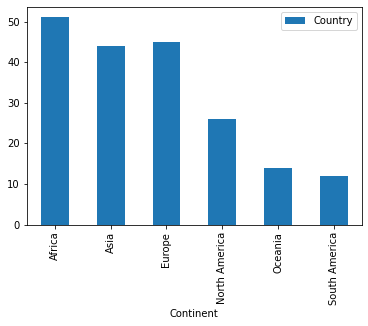

In [125]:
gdp_df.groupby('Continent').agg({'Country':'nunique'}).plot(kind='bar')

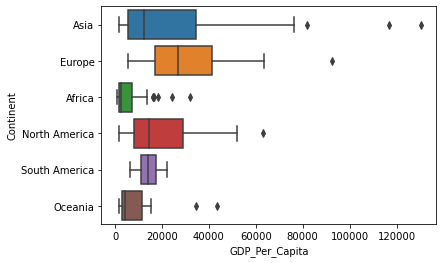

In [127]:
# 21, Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?
sns.boxplot(data = gdp_df[gdp_df['Year']==2014], x = 'GDP_Per_Capita', y = 'Continent' )

In [140]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False, skipfooter=181, engine='python')
internet_df.tail()

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [141]:
#22 Drop 'Value Footnotes' column
internet_df=internet_df.drop(columns = 'Value Footnotes')

In [144]:
#23 Change Column Names 
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [145]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [150]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [152]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000
